In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from functools import partial
%matplotlib inline

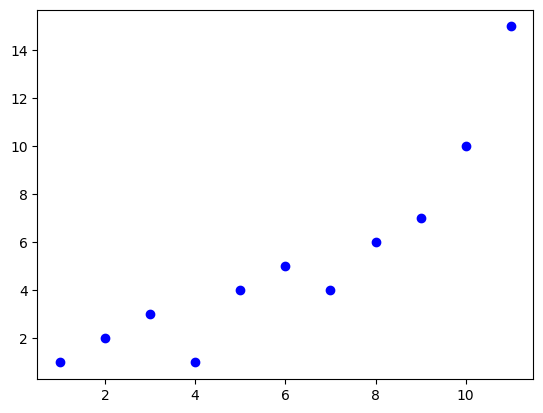

In [2]:
# Given these coordenates
x_points = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_points = [1, 2, 3, 1, 4, 5, 4, 6, 7, 10, 15]
# Let's plot to display how they are located
plt.plot(x_points, y_points, 'bo')

In [3]:
# remeber the straight line equation? We will use it to find `y` and plot a straight line.
def straight_line_equation(m, x, b):
    '''Calculate Y based on straight line equation.
    
    :m: slope or gradient (how steep the line is)
    :x: how far along
    :b: the Y intercept (where the line crosses the Y axis)
    :returns: calculated y
    '''
    return m * x + b

# now define a function to plot a straight line
def plot_straight_line(data_points, m, b):
    '''Use matplotlib to plot a straight line.
    
    :data_points: x points used to a the straight line
    :m: how far along
    :b: the Y intercept (where the line crosses the Y axis)
    :returns: None(plot a graph)
    '''
    x_values = range(int(min(data_points)) - 1, int(max(data_points) +2))
    y_values = [straight_line_equation(x, m, b) for x in x_values]
    plt.plot(x_values, y_values, 'r')
    

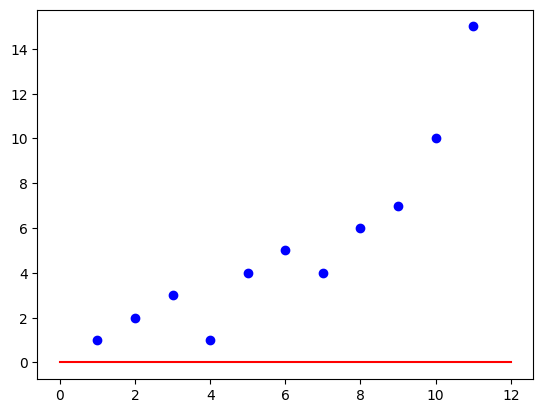

In [4]:
# To test our function, let's plot a initial straight line
plot_straight_line(x_points, m=0, b=0)
plt.plot(x_points, y_points, 'bo')

In [5]:
def Σ(lower_bound, upper_bound, function):
    '''Summation is a math operator to easily represent a great sum of terms,
    even infinity.
    It's represented with the greek letter sigma.
    Sum terms from lower_bound until upper_bound, applying some function on
    each term.
    >>> Σ(1,5,lambda x:x)  # 1 + 2 + 3 + 4 + 5 = 15
    15
    '''
    return sum(function(index) for index in range(lower_bound,
                                                   upper_bound + 1))


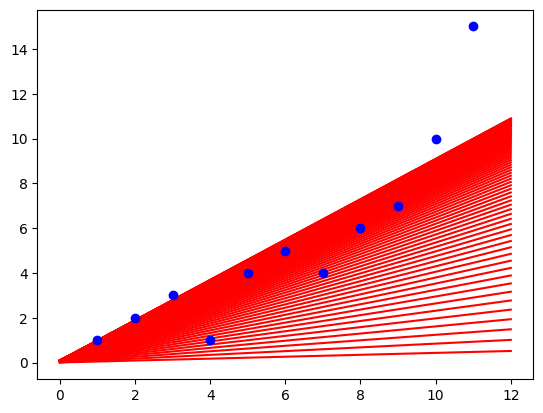

In [6]:
LEARN = .001 # mean standard error


def derived_at_point_A(index, x_points, y_points, m, b):
    'Derived from the equation of the plane at point A.'
    return straight_line_equation(x_points[index],m,b) - y_points[index]


def derived_at_point_B(index, x_points, y_points, m, b):
    'Derived from the equation of the plane at point B.'
    return (straight_line_equation(x_points[index],m,b) - y_points[index]) * x_points[index]

def separate_points(x_points, y_points, *, intermediate_lines=False):
    '''Divide some points into 2 classes.
    
    Obs: 80 is an arbitrary point, because we need logistic regression to obtain that perfect number.
    '''
    m = 0
    b = 0
    for i in range(80):
        mean1 = Σ(1, len(x_points) -1, partial(derived_at_point_A, x_points=x_points, y_points=y_points, m=m, b=b)) / len(x_points)
        mean2 = Σ(1, len(x_points) -1, partial(derived_at_point_B, x_points=x_points, y_points=y_points, m=m, b=b)) / len(x_points)
        m -= mean2 * LEARN
        b -= mean1 * LEARN
        if intermediate_lines:
            plot_straight_line(x_points, m, b)
    plot_straight_line(x_points, m, b)
    plt.plot(x_points, y_points, 'bo')


separate_points(x_points, y_points, intermediate_lines=True)

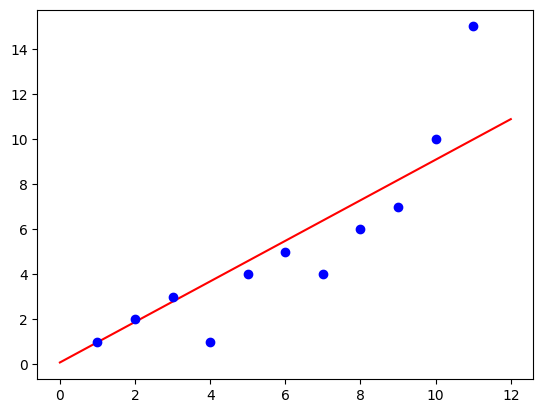

In [7]:
separate_points(x_points, y_points)

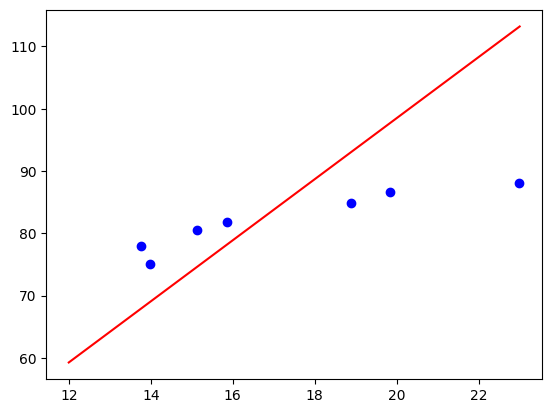

In [8]:
# homework
df = pd.read_csv('tabela.csv')
x_points, y_points = df['faturamento'], df['tempo']
separate_points(x_points, y_points)